# Task #1: Prediction using Supervised ML
# Creater : Satvik
## Predict the percentage of marks of an student based on the number of study hours

### Linear Regression with Python using Scikit-Learn
In this section, we will see how the Python *Scikit-Learn library* for **ML** can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Problem statement:
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### To predict:
What will be predicted score if a student studies for 9.25 hrs/ day?

### Import required libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Load Dataset
● Data can be found at http://bit.ly/w-data\

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)  

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


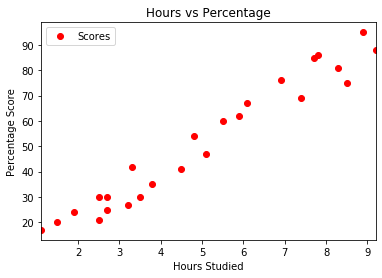

In [5]:
df.plot(x='Hours', y='Scores', style='o',c='r')
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Prepare the Data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). and spliting that data into training and test sets.

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.shape

(25, 2)

### Separation of independent and dependent matrices

In [8]:
# Independent Matrix
X = df.iloc[:,:-1].values
X.T

array([[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]])

In [9]:
# Dependent Matrix
y = df.iloc[ : , 1].values
y.T

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Preparing Training and testing Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print("Shape of Train Data of X :",X_train.shape)
print("Shape of Test Data of X :",X_test.shape)
print("\nShape of Train Data of y :",y_train.shape)
print("Shape of Test Data of y :",y_test.shape)

Shape of Train Data of X : (20, 1)
Shape of Test Data of X : (5, 1)

Shape of Train Data of y : (20,)
Shape of Test Data of y : (5,)


### Train the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print("Coefficient Value =",lr.coef_)

print("Intercept Value =",lr.intercept_)

Coefficient Value = [9.85843229]
Intercept Value = 1.18235637312101


### Simple linear equation  :  Y = mX + c

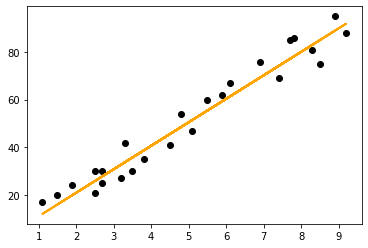

In [14]:
# Plotting the regression line # formula for line is y=m*x + c
line = lr.coef_ * X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c='black')
plt.plot(X, line, c='orange',linewidth=2);
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
y_pred=lr.predict(X_test)

list(zip(y_test,y_pred))

[(67, 61.31879332829981),
 (42, 33.71518292264397),
 (30, 25.828437092456586),
 (86, 78.078128217448),
 (88, 91.87993342027592)]

In [16]:
df1 = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df1

,Actual,Predicted
0,67,61.318793
1,42,33.715183
2,30,25.828437
3,86,78.078128
4,88,91.879933


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the **mean square error** and **mean absolute error**. There are many such metrics.

**MSE:** is the average squared difference between the estimated values and the actual value.

In [21]:
mean_squared_error(y_test,y_pred)

4.797834650875306

**MAE:** the amount of error in your measurements. It is the difference between the measured value and “true” value.

In [18]:
metrics.mean_absolute_error(y_test,y_pred)

4.468787262698274

### Let's Predict on our own data: 

In [22]:
hour =[9.25]
own_pr=lr.predict([hour])
print("No of Hours = {}".format([hour]))
print("Predicted Score = {}".format(own_pr[0]))

No of Hours = [[9.25]]
Predicted Score = 92.37285503466263


|Predicted Score = 92.37|
|----|

**Hence, predicted score is 92 (92.372) if a student studies for 9.25 hrs/ day**

-----

### Difference in Actual & Predicted values

Text(0.5, 1.0, 'Hrs/day vs Score')

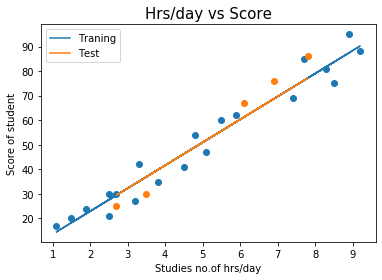

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train, lr.predict(X_train))

plt.scatter(X_test,y_test)
plt.plot(X_test, lr.predict(X_test))

plt.legend(['Traning','Test'])
plt.xlabel('Studies no.of hrs/day')
plt.ylabel('Score of student')
plt.title('Hrs/day vs Score',fontsize = 15)